Web scraping from Wikipedia, fetch stock price data and plot the stock closing price. Built with `pandas`, `yfinance`, and `matplotlib`

Source: [List of S&P 500 Companies](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) (Wikipedia)

Tutorial: [Data Science Web Apps Tutorial by Data Professor](https://www.youtube.com/watch?v=JwSS70SZdyM&list=PLRpb1EfB9cjuOFw_ZVmeqlCgdhYjdbBMO&index=13&ab_channel=freeCodeCamp.org)



# Extracting Data

In [1]:
import pandas as pd

In [2]:
def load_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header=0)
    df = html[0]
    return df

In [3]:
df = load_data()
df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


# Simple Exploratory Data Analysis (EDA)

## Examining the Sectors

In [4]:
unique_sector = df['GICS Sector'].unique()
unique_sector

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy'], dtype=object)

In [5]:
len(unique_sector)

11

## Group by Sector

In [6]:
sector = df.groupby('GICS Sector')

In [7]:
sector.first()

,Symbol,Security,SEC filings,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
GICS Sector,,,,,,,,
Communication Services,ATVI,Activision Blizzard,reports,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
Consumer Discretionary,AAP,Advance Auto Parts,reports,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
Consumer Staples,MO,Altria Group,reports,Tobacco,"Richmond, Virginia",1957-03-04,764180,1985
Energy,APA,APA Corporation,reports,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,6769,1954
Financials,AFL,Aflac,reports,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
Health Care,ABT,Abbott Laboratories,reports,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
Industrials,MMM,3M,reports,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
Information Technology,ACN,Accenture,reports,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
Materials,APD,Air Products & Chemicals,reports,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940


In [8]:
sector.describe()

CIK                                                   \
                       count          mean            std      min        25%   
GICS Sector                                                                     
Communication Services  26.0  1.115660e+06  524383.320718  18926.0  752994.75   
Consumer Discretionary  63.0  8.477582e+05  475172.166505  27419.0  723858.50   
Consumer Staples        32.0  3.872794e+05  564407.571740   7084.0   24213.00   
Energy                  22.0  7.790030e+05  606535.723781   4447.0   95502.00   
Financials              65.0  6.313738e+05  542517.054005   4962.0   64040.00   
Health Care             64.0  8.158064e+05  527611.451375   1800.0  312903.00   
Industrials             74.0  6.859374e+05  592033.294395   4281.0   79229.75   
Information Technology  74.0  8.987211e+05  499064.848336   2488.0  743484.00   
Materials               28.0  8.369064e+05  699182.236462   2969.0   67840.25   
Real Estate             29.0  8.957202e+05  327862.587502  34903.0  783280.00   
Utilities               28.0  8.035041e+05  431315.460314   4904.0  727840.75   

                                                          
                              50%         75%        max  
GICS Sector                                               
Communication Services  1225195.0  1532807.75  1754301.0  
Consumer Discretionary   920760.0  1164229.50  1590895.0  
Consumer Staples          70615.0   789573.00  1679273.0  
Energy                   940165.0  1144876.75  1701605.0  
Financials               720005.0  1120193.00  1601712.0  
Health Care              880632.0  1097811.75  1821825.0  
Industrials              756468.0  1084970.50  1783180.0  
Information Technology   880565.5  1275848.75  1730168.0  
Materials                915994.5  1419355.00  1755672.0  
Real Estate              920522.0  1053507.00  1393311.0  
Utilities                850906.5  1036121.50  1711269.0

## Examine Data by Sector

In [9]:
sector.get_group('Health Care') # change the sector name to examin

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
11,A,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999
17,ALXN,Alexion Pharmaceuticals,reports,Health Care,Pharmaceuticals,"Boston, Massachusetts",2012-05-25,899866,1992
...,...,...,...,...,...,...,...,...,...
474,VTRS,Viatris,reports,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
484,WAT,Waters Corporation,reports,Health Care,Health Care Distributors,"Milford, Massachusetts",NaN,1000697,1958
488,WST,West Pharmaceutical Services,reports,Health Care,Health Care Supplies,"Exton, Pennsylvania",2020-05-22,105770,1923
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


# Finance Data

Now we retrieve the stock price data using the symbols of the companies listed above.

In [10]:
import yfinance as yf

## List of S&P Companies Symbols

In [11]:
list_of_symbols = list(df.Symbol)

## Retrieve Stock Data

Retrieve all stock data of all S&P companies using `yfinance`

In [12]:
# https://pypi.org/project/yfinance/

data = yf.download(

    # tickers list or string
    tickers = list_of_symbols, # list(df.Symbol)

    # use "period" instead of "start"/"end"
    # valid periods: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    # optional, default value: 1mo
    period="ytd",

    # fetch data by interval (including intraday if period < 60 days)
    # valid internvals: 1m, 2m, 5m, 15m, 30m, 60m, 90, 1h, 1d, 5d, 1wk, 1mo, 3mo
    # optional, default value: 1d
    interval="1d",

    # group by ticker (to access via data['SPY'])
    # optional, default value is column
    group_by="ticker",

    # adjust all OHLC automatically
    # optional, default is False
    auto_adjust=True,

    # download pre/post regular market hours data
    # optional, default is False
    perpost=True,

    # use threads for mass downloading it
    # optional, default is True
    threads=True,

    # proxy URL scheme use use when downloading
    # optional, default is None
    proxy=None
)

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [13]:
data

QRVO                                               \
                  Open        High         Low       Close   Volume   
Date                                                                  
2021-01-04  167.300003  170.529999  162.113998  164.589996  1249700   
2021-01-05  164.399994  169.389999  163.100006  169.250000  1150100   
2021-01-06  166.770004  174.270004  166.110001  172.000000  1273200   
2021-01-07  174.699997  179.169998  174.649994  178.570007  1064500   
2021-01-08  180.779999  182.000000  177.479996  179.399994   791600   
...                ...         ...         ...         ...      ...   
2021-07-01  196.389999  196.389999  192.289993  193.179993   887100   
2021-07-02  195.000000  197.320007  193.339996  195.669998   724100   
2021-07-06  195.809998  197.065994  192.440002  194.300003   911200   
2021-07-07  196.000000  196.000000  188.785004  192.000000   848900   
2021-07-08  187.029999  191.449997  185.330002  189.440002   837600   

                   ABT                                               ...  \
                  Open        High         Low       Close   Volume  ...   
Date                                                                 ...   
2021-01-04  108.691441  109.405930  106.438823  108.274658  6192000  ...   
2021-01-05  108.016644  110.060878  107.470860  109.614319  4322800  ...   
2021-01-06  108.115879  110.179956  107.758634  109.386086  5539600  ...   
2021-01-07  109.435696  110.765441  108.413583  110.447891  5568800  ...   
2021-01-08  110.815054  111.688322  109.495235  110.755516  4242200  ...   
...                ...         ...         ...         ...      ...  ...   
2021-07-01  115.610001  117.290001  115.480003  117.160004  4739600  ...   
2021-07-02  116.919998  118.250000  116.650002  118.040001  4787000  ...   
2021-07-06  118.000000  119.070000  117.760002  118.820000  5040400  ...   
2021-07-07  119.080002  119.980003  118.750000  119.870003  4068700  ...   
2021-07-08  118.860001  119.430000  117.959999  119.260002  3908900  ...   

                  HRL                                                   UNP  \
                 Open       High        Low      Close   Volume        Open   
Date                                                                          
2021-01-04  46.198853  46.248330  45.268743  45.822853  2593400  206.094424   
2021-01-05  45.694216  45.822849  45.041159  45.308319  2307900  201.002495   
2021-01-06  45.150003  45.862426  45.060949  45.585373  2258300  203.627713   
2021-01-07  45.615056  45.654636  44.971895  45.239056  1882900  208.640384   
2021-01-08  45.383301  45.482785  44.667040  45.204235  2171800  215.961282   
...               ...        ...        ...        ...      ...         ...   
2021-07-01  47.730000  47.770000  47.439999  47.570000  1344100  221.520004   
2021-07-02  47.740002  47.900002  47.680000  47.770000  1440100  224.100006   
2021-07-06  47.700001  47.980000  47.520000  47.900002  1305600  225.229996   
2021-07-07  47.849998  48.290001  47.730000  48.029999  1392100  222.820007   
2021-07-08  47.939999  48.590000  47.630001  47.750000  1342000  222.100006   

                                                         
                  High         Low       Close   Volume  
Date                                                     
2021-01-04  207.075171  199.496719  201.111465  2642400  
2021-01-05  204.509398  200.962876  203.578186  2127300  
2021-01-06  209.631037  203.211642  207.837967  2512400  
2021-01-07  211.354765  207.164313  210.730652  2023000  
2021-01-08  219.210606  214.960733  216.773621  3922900  
...                ...         ...         ...      ...  
2021-07-01  223.669998  221.309998  223.550003  2363900  
2021-07-02  225.929993  223.419998  224.720001  1706600  
2021-07-06  225.500000  221.309998  223.809998  2263600  
2021-07-07  228.740005  222.509995  228.350006  2610100  
2021-07-08  223.220001  217.410004  218.339996  5668600  

[129 rows x 2527 columns]

## Data Subset of Query Symbol

In [14]:
data['AAPL'] # using APPLE as an example

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,133.094712,133.184422,126.356242,128.997803,143301900
2021-01-05,128.479455,131.320383,128.020913,130.592697,97664900
2021-01-06,127.313182,130.632577,125.977446,126.196747,155088000
2021-01-07,127.951147,131.210736,127.452740,130.502991,109578200
2021-01-08,132.008159,132.207534,129.815169,131.629379,104965400
...,...,...,...,...,...
2021-07-01,136.600006,137.330002,135.759995,137.270004,52485800
2021-07-02,137.899994,140.000000,137.750000,139.960007,78852600
2021-07-06,140.070007,143.149994,140.070007,142.020004,108181800


## Plot Closing Price of Query Symbol

In [15]:
import matplotlib.pyplot as plt

In [16]:
df = pd.DataFrame(data['AAPL'].Close)
df['Date'] = df.index
df

,Close,Date
Date,,
2021-01-04,128.997803,2021-01-04
2021-01-05,130.592697,2021-01-05
2021-01-06,126.196747,2021-01-06
2021-01-07,130.502991,2021-01-07
2021-01-08,131.629379,2021-01-08
...,...,...
2021-07-01,137.270004,2021-07-01
2021-07-02,139.960007,2021-07-02
2021-07-06,142.020004,2021-07-06


Text(0, 0.5, 'Closing Price')

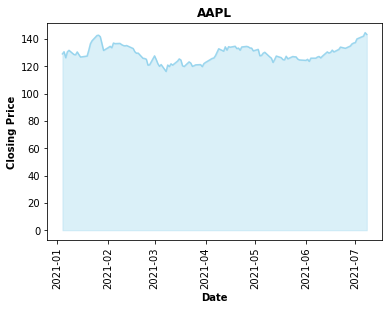

In [17]:
plt.fill_between(df.Date, df.Close, color='skyblue', alpha=0.3)
plt.plot(df.Date, df.Close, color='skyblue', alpha=0.8)
plt.xticks(rotation=90)
plt.title('AAPL', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Closing Price', fontweight='bold')

In [18]:
# custom function (in the code)

# Plot Closing Price of Query Symbol
def price_plot(symbol):
  df = pd.DataFrame(data[symbol].Close)
  df['Date'] = df.index
  plt.fill_between(df.Date, df.Close, color='skyblue', alpha=0.3)
  plt.plot(df.Date, df.Close, color='skyblue', alpha=0.8)
  plt.xticks(rotation=90)
  plt.title(symbol, fontweight='bold')
  plt.xlabel('Date', fontweight='bold')
  plt.ylabel('Closing Price', fontweight='bold')
  return plt.show()

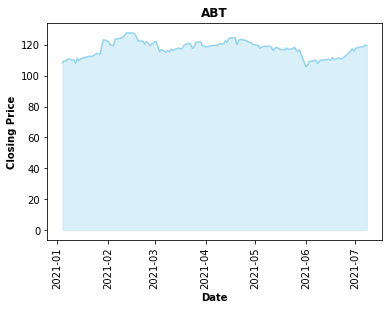

In [19]:
# plot stock price for ABT
price_plot('ABT')

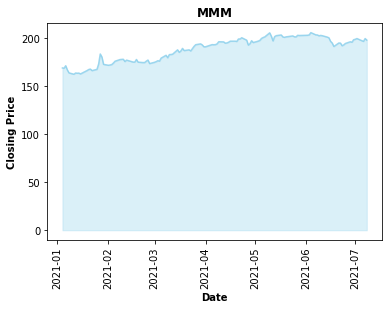

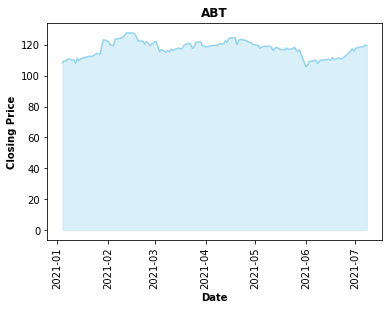

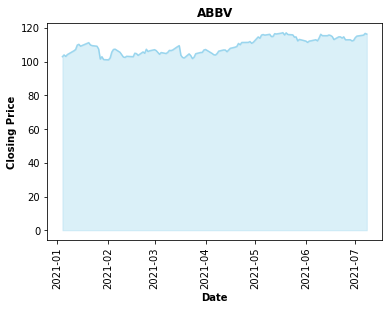

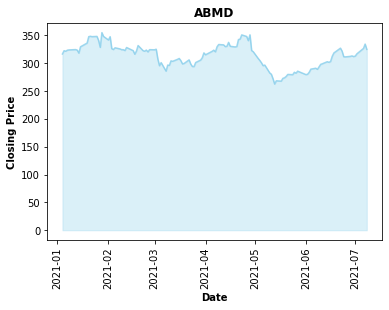

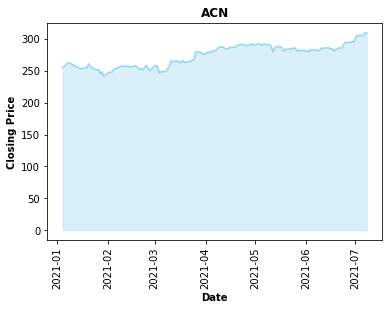

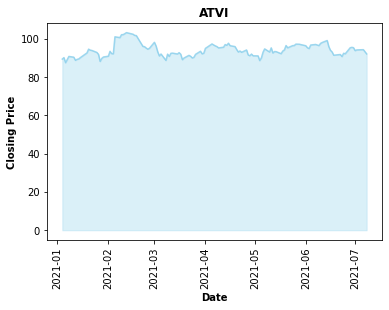

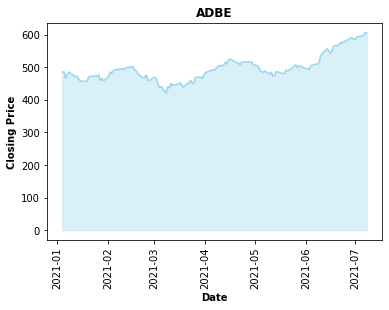

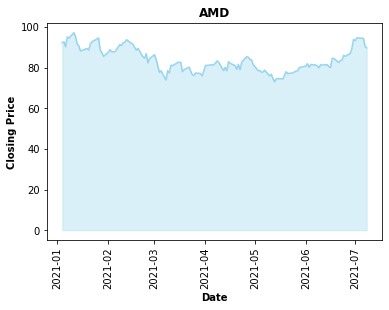

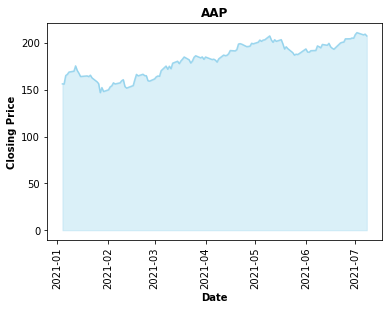

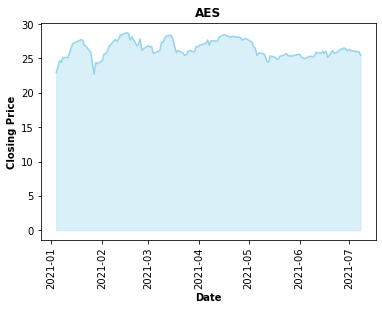

In [20]:
# plot stock price for first 10 companies
for symbol in list_of_symbols[:10]:
    price_plot(symbol)

## Plotting with Altair

In [21]:
data_mini = yf.download(
    # tickers list or string
    tickers = list_of_symbols[:10], # list(df.Symbol)
    period="ytd",
    interval="1d",
    group_by="ticker",
    auto_adjust=True,
    perpost=True,
    threads=True,
    proxy=None
)

[*********************100%***********************]  10 of 10 completed


In [22]:
data_mini

AMD                                                   ABMD  \
                 Open       High        Low      Close    Volume        Open   
Date                                                                           
2021-01-04  92.110001  96.059998  90.919998  92.300003  51802600  324.570007   
2021-01-05  92.099998  93.209999  91.410004  92.769997  34208000  316.790009   
2021-01-06  91.620003  92.279999  89.459999  90.330002  51911700  315.869995   
2021-01-07  91.330002  95.510002  91.199997  95.160004  42897200  321.619995   
2021-01-08  95.980003  96.400002  93.269997  94.580002  39765600  325.040009   
...               ...        ...        ...        ...       ...         ...   
2021-07-01  94.040001  94.180000  91.699997  93.309998  58059000  311.019989   
2021-07-02  93.279999  95.269997  92.209999  94.699997  51316700  315.489990   
2021-07-06  94.879997  95.410004  93.320000  94.470001  44930100  317.279999   
2021-07-07  95.019997  95.440002  90.309998  90.540001  51498500  328.299988   
2021-07-08  87.860001  90.339996  87.449997  89.739998  45630700  331.859985   

                                                        ...         AAP  \
                  High         Low       Close  Volume  ...        Open   
Date                                                    ...               
2021-01-04  329.320007  308.950012  316.730011  364500  ...  156.882301   
2021-01-05  326.290009  316.730011  322.600006  263000  ...  155.223069   
2021-01-06  324.660004  315.720001  321.609985  301500  ...  156.196754   
2021-01-07  327.649994  318.160004  323.559998  330200  ...  164.890355   
2021-01-08  330.799988  320.459991  324.059998  292700  ...  167.225207   
...                ...         ...         ...     ...  ...         ...   
2021-07-01  317.570007  311.019989  312.910004  276200  ...  205.809998   
2021-07-02  318.220001  312.790009  317.019989  178100  ...  208.929993   
2021-07-06  328.200012  317.119995  326.709991  275400  ...  210.399994   
2021-07-07  335.890015  325.279999  334.529999  283600  ...  207.429993   
2021-07-08  331.859985  322.000000  325.040009  240200  ...  206.869995   

                                                              ATVI             \
                  High         Low       Close   Volume       Open       High   
Date                                                                            
2021-01-04  158.541551  154.954817  156.325912   849100  92.253316  92.462310   
2021-01-05  157.120762  154.338806  156.157013   619500  89.884786  90.312714   
2021-01-06  165.714995  156.196754  165.178482  1584000  88.630856  89.466812   
2021-01-07  167.712047  163.539120  166.589325   993200  88.431821  90.312713   
2021-01-08  169.967428  167.016569  168.963928   864500  89.635993  90.929732   
...                ...         ...         ...      ...        ...        ...   
2021-07-01  209.179993  204.830002  208.940002   611300  95.070000  95.400002   
2021-07-02  211.160004  208.220001  211.050003   522300  94.750000  95.040001   
2021-07-06  210.550003  206.470001  208.699997   540600  94.470001  95.199997   
2021-07-07  209.770004  206.600006  209.440002   689600  95.260002  95.269997   
2021-07-08  209.699997  205.460007  207.509995   661100  92.400002  93.050003   

                                           
                  Low      Close   Volume  
Date                                       
2021-01-04  88.790088  89.466812  7423100  
2021-01-05  88.670664  90.253006  4544100  
2021-01-06  87.466495  87.575966  7422100  
2021-01-07  87.844660  89.237915  6142200  
2021-01-08  89.098594  90.860069  4408800  
...               ...        ...      ...  
2021-07-01  93.220001  93.900002  5055100  
2021-07-02  93.580002  94.269997  3101400  
2021-07-06  93.680000  94.400002  3833300  
2021-07-07  93.139999  93.309998  3444200  
2021-07-08  91.750000  92.180000  6128100  

[129 rows x 50 columns]

In [23]:
import altair as alt

In [24]:
df = data_mini.T.reset_index()
df

Date,level_0,level_1,2021-01-04 00:00:00,2021-01-05 00:00:00,2021-01-06 00:00:00,2021-01-07 00:00:00,2021-01-08 00:00:00,2021-01-11 00:00:00,2021-01-12 00:00:00,2021-01-13 00:00:00,...,2021-06-24 00:00:00,2021-06-25 00:00:00,2021-06-28 00:00:00,2021-06-29 00:00:00,2021-06-30 00:00:00,2021-07-01 00:00:00,2021-07-02 00:00:00,2021-07-06 00:00:00,2021-07-07 00:00:00,2021-07-08 00:00:00
0,AMD,Open,9.211000e+01,9.210000e+01,9.162000e+01,9.133000e+01,9.598000e+01,9.403000e+01,9.786000e+01,9.301000e+01,...,8.439000e+01,8.634000e+01,8.638000e+01,8.741000e+01,9.082000e+01,9.404000e+01,9.328000e+01,9.488000e+01,9.502000e+01,8.786000e+01
1,AMD,High,9.606000e+01,9.321000e+01,9.228000e+01,9.551000e+01,9.640000e+01,9.923000e+01,9.897000e+01,9.389000e+01,...,8.714000e+01,8.636000e+01,8.800000e+01,9.030000e+01,9.434000e+01,9.418000e+01,9.527000e+01,9.541000e+01,9.544000e+01,9.034000e+01
2,AMD,Low,9.092000e+01,9.141000e+01,8.946000e+01,9.120000e+01,9.327000e+01,9.376000e+01,9.407000e+01,9.084000e+01,...,8.437000e+01,8.510000e+01,8.615000e+01,8.666000e+01,9.060000e+01,9.170000e+01,9.221000e+01,9.332000e+01,9.031000e+01,8.745000e+01
3,AMD,Close,9.230000e+01,9.277000e+01,9.033000e+01,9.516000e+01,9.458000e+01,9.725000e+01,9.536000e+01,9.178000e+01,...,8.610000e+01,8.562000e+01,8.708000e+01,8.952000e+01,9.393000e+01,9.331000e+01,9.470000e+01,9.447000e+01,9.054000e+01,8.974000e+01
4,AMD,Volume,5.180260e+07,3.420800e+07,5.191170e+07,4.289720e+07,3.976560e+07,4.866910e+07,6.767230e+07,6.071290e+07,...,4.221770e+07,2.780450e+07,3.026200e+07,4.618100e+07,7.072150e+07,5.805900e+07,5.131670e+07,4.493010e+07,5.149850e+07,4.563070e+07
5,ABMD,Open,3.245700e+02,3.167900e+02,3.158700e+02,3.216200e+02,3.250400e+02,3.205300e+02,3.232300e+02,3.235300e+02,...,3.223000e+02,3.123000e+02,3.125000e+02,3.113100e+02,3.143700e+02,3.110200e+02,3.154900e+02,3.172800e+02,3.283000e+02,3.318600e+02
6,ABMD,High,3.293200e+02,3.262900e+02,3.246600e+02,3.276500e+02,3.308000e+02,3.261500e+02,3.285900e+02,3.273500e+02,...,3.245400e+02,3.142800e+02,3.141800e+02,3.159100e+02,3.193600e+02,3.175700e+02,3.182200e+02,3.282000e+02,3.358900e+02,3.318600e+02
7,ABMD,Low,3.089500e+02,3.167300e+02,3.157200e+02,3.181600e+02,3.204600e+02,3.200000e+02,3.220600e+02,3.219300e+02,...,3.108500e+02,3.089900e+02,3.097100e+02,3.098000e+02,3.099200e+02,3.110200e+02,3.127900e+02,3.171200e+02,3.252800e+02,3.220000e+02
8,ABMD,Close,3.167300e+02,3.226000e+02,3.216100e+02,3.235600e+02,3.240600e+02,3.245900e+02,3.246700e+02,3.237100e+02,...,3.118100e+02,3.115400e+02,3.124400e+02,3.132700e+02,3.121100e+02,3.129100e+02,3.170200e+02,3.267100e+02,3.345300e+02,3.250400e+02
9,ABMD,Volume,3.645000e+05,2.630000e+05,3.015000e+05,3.302000e+05,2.927000e+05,3.145000e+05,3.395000e+05,3.110000e+05,...,3.673000e+05,3.555000e+05,2.391000e+05,2.070000e+05,2.661000e+05,2.762000e+05,1.781000e+05,2.754000e+05,2.836000e+05,2.402000e+05


In [25]:
df_filtered = df[df['level_1']=='Close'].copy()
df_filtered.drop(columns='level_1', inplace=True)
df_filtered

Date,level_0,2021-01-04 00:00:00,2021-01-05 00:00:00,2021-01-06 00:00:00,2021-01-07 00:00:00,2021-01-08 00:00:00,2021-01-11 00:00:00,2021-01-12 00:00:00,2021-01-13 00:00:00,2021-01-14 00:00:00,...,2021-06-24 00:00:00,2021-06-25 00:00:00,2021-06-28 00:00:00,2021-06-29 00:00:00,2021-06-30 00:00:00,2021-07-01 00:00:00,2021-07-02 00:00:00,2021-07-06 00:00:00,2021-07-07 00:00:00,2021-07-08 00:00:00
3,AMD,92.300003,92.769997,90.330002,95.160004,94.580002,97.250000,95.360001,91.779999,90.790001,...,86.099998,85.620003,87.080002,89.519997,93.930000,93.309998,94.699997,94.470001,90.540001,89.739998
8,ABMD,316.730011,322.600006,321.609985,323.559998,324.059998,324.589996,324.670013,323.709991,318.309998,...,311.809998,311.540009,312.440002,313.269989,312.109985,312.910004,317.019989,326.709991,334.529999,325.040009
13,ABBV,102.939789,104.004242,103.105804,104.209320,104.756195,106.465187,107.207375,109.814804,110.289040,...,114.739998,112.980003,113.000000,112.300003,112.639999,114.260002,115.169998,115.730003,116.750000,116.349998
18,AES,22.963434,23.734154,24.682728,24.435701,25.117493,25.157017,25.710352,26.560118,27.123335,...,25.969999,26.219999,26.530001,26.370001,26.070000,26.330000,26.160000,26.000000,25.990000,25.490000
23,ACN,254.798035,256.248596,259.050293,261.494385,262.448151,258.662842,256.725464,256.286804,254.213242,...,291.559998,294.660004,293.899994,296.429993,294.790009,300.000000,304.839996,305.399994,309.609985,309.149994
28,MMM,169.220032,168.934494,171.504257,167.103180,164.050964,162.652863,163.942673,163.716217,163.844223,...,193.259995,194.750000,196.500000,196.029999,198.630005,199.089996,199.889999,196.889999,199.860001,198.270004
33,ABT,108.274658,109.614319,109.386086,110.447891,110.755516,109.991402,108.006714,111.291382,109.637451,...,111.699997,112.720001,115.699997,117.209999,115.930000,117.160004,118.040001,118.820000,119.870003,119.260002
38,ADBE,485.339996,485.690002,466.309998,477.739990,485.100006,474.239990,471.649994,472.049988,463.269989,...,578.260010,579.659973,588.799988,590.750000,585.640015,584.729980,593.070007,596.900024,605.770020,605.950012
43,AAP,156.325912,156.157013,165.178482,166.589325,168.963928,169.917755,175.531326,170.652969,167.741867,...,200.960007,204.429993,204.509995,205.300003,205.139999,208.940002,211.050003,208.699997,209.440002,207.509995
48,ATVI,89.466812,90.253006,87.575966,89.237915,90.860069,90.471947,88.819946,89.337433,89.556374,...,92.510002,92.260002,95.400002,95.610001,95.440002,93.900002,94.269997,94.400002,93.309998,92.180000


In [26]:
df_melt = pd.melt(df_filtered, id_vars=["level_0"]).rename(
    columns={"level_0":"Company", "value": "Closing Value"}
)
df_melt

,Company,Date,Closing Value
0,AMD,2021-01-04,92.300003
1,ABMD,2021-01-04,316.730011
2,ABBV,2021-01-04,102.939789
3,AES,2021-01-04,22.963434
4,ACN,2021-01-04,254.798035
...,...,...,...
1285,MMM,2021-07-08,198.270004
1286,ABT,2021-07-08,119.260002
1287,ADBE,2021-07-08,605.950012
1288,AAP,2021-07-08,207.509995


In [27]:
chart = (
    alt.Chart(df_melt)
    .mark_area(opacity=0.4)
    .encode(
        x="Date:T",
        y=alt.Y("Closing Value"),
        color="Company:N"
    )
)
alt.data_transformers.disable_max_rows()
chart

alt.Chart(...)